In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning & preprocessing
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder

# Settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

### Load datasets

In [2]:
# Load datasets
train_df = pd.read_csv("train (1).csv")
test_df = pd.read_csv("test (1).csv")
gender_df = pd.read_csv("gender_submission.csv")

In [3]:
# Preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Preview data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Preview data
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Basic Dataset Inspection

In [6]:
print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)

Train Shape: (891, 12)
Test Shape: (418, 11)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Check Missing Values

In [9]:
# Missing values count
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 🔍 Visualize Missing Values

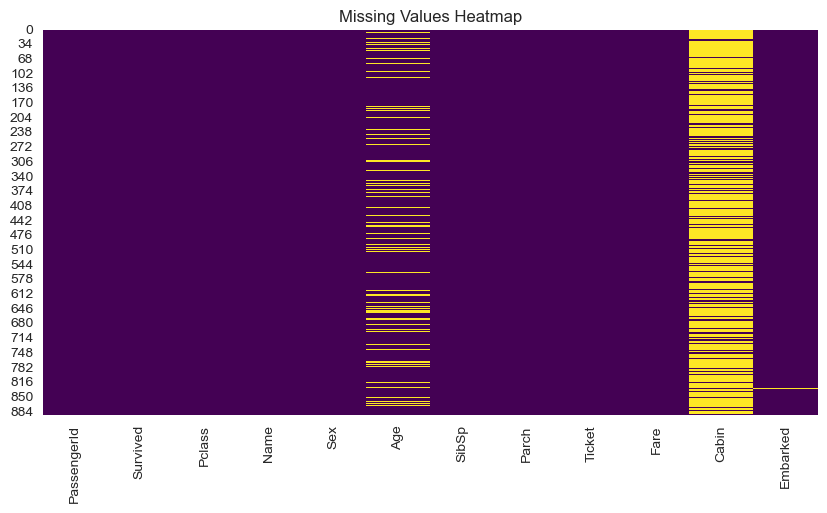

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [11]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

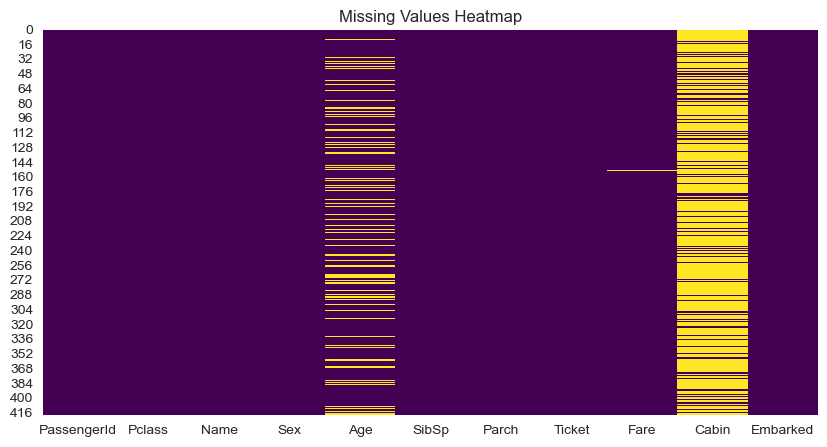

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(test_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### Remove Duplicate Rows (if any)

In [13]:
print("Duplicate rows:", train_df.duplicated().sum())

Duplicate rows: 0


In [14]:
train_df.drop_duplicates(inplace=True)

In [15]:
print("Duplicate rows:", test_df.duplicated().sum())

Duplicate rows: 0


In [16]:
test_df.drop_duplicates(inplace=True)

### Handle Missing Values – Multiple Techniques

In [17]:
# Age → Median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Embarked → Mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

C:\Users\Shridhar\AppData\Local\Temp\ipykernel_2844\2372764736.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\Shridhar\AppData\Local\Temp\ipykernel_2844\2372764736.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [18]:
# Age → Median
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Embarked → Mode
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)


C:\Users\Shridhar\AppData\Local\Temp\ipykernel_2844\3217169120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
C:\Users\Shridhar\AppData\Local\Temp\ipykernel_2844\3217169120.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

### KNN Imputation (Advanced Technique)

In [19]:
knn_imputer = KNNImputer(n_neighbors=5)

numeric_cols = ['Age', 'Fare']
train_df[numeric_cols] = knn_imputer.fit_transform(train_df[numeric_cols])

In [20]:
knn_imputer = KNNImputer(n_neighbors=5)

numeric_cols = ['Age', 'Fare']
test_df[numeric_cols] = knn_imputer.fit_transform(test_df[numeric_cols])

### Drop Column with Too Many Missing Values

In [21]:
# Cabin has too many missing values
train_df.drop(columns=['Cabin'], inplace=True)

In [22]:
# Cabin has too many missing values
test_df.drop(columns=['Cabin'], inplace=True)

### Outlier Detection & Treatment

In [24]:
# Using IQR Method
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cap outliers
train_df['Fare'] = np.where(train_df['Fare'] > upper, upper, train_df['Fare'])
train_df['Fare'] = np.where(train_df['Fare'] < lower, lower, train_df['Fare'])

In [26]:
# Using IQR Method
Q1 = test_df['Fare'].quantile(0.25)
Q3 = test_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cap outliers
test_df['Fare'] = np.where(test_df['Fare'] > upper, upper, test_df['Fare'])
test_df['Fare'] = np.where(test_df['Fare'] < lower, lower, test_df['Fare'])

### Fix Incorrect Data Types

In [27]:
train_df['Pclass'] = train_df['Pclass'].astype('category')
train_df['Survived'] = train_df['Survived'].astype('int')

In [29]:
test_df['Pclass'] = test_df['Pclass'].astype('category')

### Handle Categorical Data

In [31]:
# Lable encoder
le = LabelEncoder()

train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])

In [32]:
# Lable encoder
le = LabelEncoder()

test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])

### Feature Engineering (Cleaning + Enhancement)

In [33]:
# Create Family Size feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [34]:
# Create Family Size feature
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

### Drop Irrelevant Columns

In [35]:
train_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [36]:
test_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

### Final Cleaned Dataset Check

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int32   
 1   Pclass      891 non-null    category
 2   Sex         891 non-null    int32   
 3   Age         891 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Embarked    891 non-null    int32   
 8   FamilySize  891 non-null    int64   
dtypes: category(1), float64(2), int32(3), int64(3)
memory usage: 46.4 KB


In [38]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,65.6344,0,2
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,1


In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    category
 1   Sex         418 non-null    int32   
 2   Age         418 non-null    float64 
 3   SibSp       418 non-null    int64   
 4   Parch       418 non-null    int64   
 5   Fare        418 non-null    float64 
 6   Embarked    418 non-null    int32   
 7   FamilySize  418 non-null    int64   
dtypes: category(1), float64(2), int32(2), int64(3)
memory usage: 20.3 KB


In [40]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,1,34.5,0,0,7.8292,1,1
1,3,0,47.0,1,0,7.0000,2,2
2,2,1,62.0,0,0,9.6875,1,1
3,3,1,27.0,0,0,8.6625,2,1
4,3,0,22.0,1,1,12.2875,2,3


### Save Cleaned Datasets

In [41]:
train_df.to_csv("cleaned_train_data.csv", index=False)
test_df.to_csv("cleaned_test_data.csv", index=False)